# Handling Imbalance Data in Domain 2

## Literature

https://dl.acm.org/doi/abs/10.1145/3343440

## Methods
Resampling data (Pre-processing)

Cost-sensitive Learning
* Weighted SVM
* One-class SVM
* Bagging

## Domain adaptation
adapt-python


In [2]:
# Imports

import pandas as pd
import json
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set()

from collections import Counter

# Imbalance data sampling techniques
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# Feature selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest, chi2, SelectPercentile
from sklearn.datasets import make_classification
from sklearn.decomposition import IncrementalPCA, PCA, SparsePCA

# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer

# Save a nice dark grey as a variable
almost_black = '#262626'


# Original Data
Full TF-IDF output.

Noted that the data with class1 (human-written) is highly intersected with class0 (machine-generated).

In [3]:
with open("/content/domain2_train_data.json") as f:
    df_domain2 = pd.read_json(f, lines=True)


In [14]:
def tfidf_tokenizer(self):
  return self

In [ ]:

# TF-IDF
tfidf_vect = TfidfVectorizer(lowercase=False, tokenizer=tfidf_tokenizer)
X = tfidf_vect.fit_transform(df_domain2['text'])
y = df_domain2['label']

# Original data
print('Original dataset shape %s' % Counter(y))

pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
original_xvis = pca.fit_transform(X.toarray())


# Visualization
palette = sns.color_palette()
plt.scatter(original_xvis[y == 0, 0], original_xvis[y == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(original_xvis[y == 1, 0], original_xvis[y == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()

Adding TF-IDF max_df to skip the very common words

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Original dataset shape Counter({0: 11500, 1: 1500})


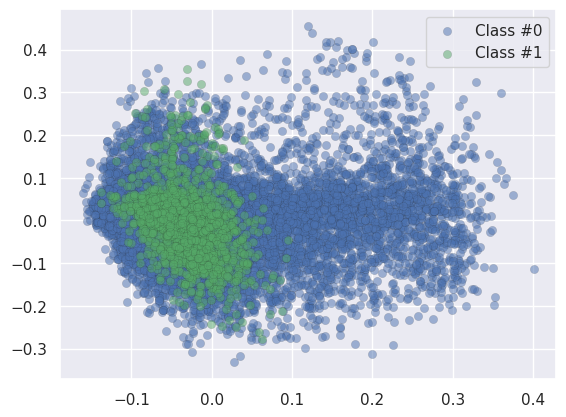

In [15]:
# TF-IDF
TFIDF_MAX_FEATURES = 5000
tfidf_vect = TfidfVectorizer(max_df=0.5,
                             max_features = TFIDF_MAX_FEATURES,
                             lowercase=False, tokenizer=tfidf_tokenizer)
X = tfidf_vect.fit_transform(df_domain2['text'])
y = df_domain2['label']

# Original data
print('Original dataset shape %s' % Counter(y))

pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
tfidf05_xvis = pca.fit_transform(X.toarray())


# Visualization
palette = sns.color_palette()
plt.scatter(tfidf05_xvis[y == 0, 0], tfidf05_xvis[y == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(tfidf05_xvis[y == 1, 0], tfidf05_xvis[y == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()

In [2]:
# Jedwin's extracted features
# Datafile from Jedwin's feature-extracted
# from scipy import sparse
# temp_sparse_ = sparse.load_npz("/content/domain2_X_y_csr.npz")
# temp_loaded = temp_sparse_.toarray()
# n_samples, n_features = temp_loaded.shape
# n_features -= 1 #Since the last column is actually the label

# X = temp_loaded[:,:n_features]
# y = temp_loaded[:,n_features]
# del temp_loaded, temp_sparse_

In [3]:
# # Just Weighted SVM (class_weight=balanced)
# selector_percentile = SelectPercentile( f_classif, percentile = 80 )
# X_new = selector_percentile.fit_transform(X, y)

# # SVM grid search for params
# C_range = np.logspace(-1, 3, 5) # Best: C=
# gamma_range = np.logspace(-1, 3, 5) # Best: gamma=
# param_grid = dict(C=C_range)
# # param_grid = dict(kernel=['linear', 'rbf'], C=C_range, gamma=gamma_range, class_weight=[None, 'balanced'])

# grid = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid=param_grid, refit = True, verbose = 3)
# grid.fit(X_new, y)

# print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


# Oversampling
SMOTE

In [7]:

# Basic Balanced SMOTE
smote = SMOTE(sampling_strategy=1.0)
X_res, y_res = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

x_res_vis = pca.transform(X_res)

# Visualization
palette = sns.color_palette()
plt.scatter(x_res_vis[y_res == 0, 0], x_res_vis[y_res == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(x_res_vis[y_res == 1, 0], x_res_vis[y_res == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()


KeyboardInterrupt: 

SMOTE resampled data to balance the datasets.

# Undersampling

For a highly imbalanced dataset, there may be many redundant or noisy negative samples. Random undersampling
is a common undersampling approach for rebalancing the
dataset to achieve better data distribution. However, random
undersampling suffers from information loss.





In [ ]:
# Undersampling

# 'Random under-sampling'
US = RandomUnderSampler()
usx, usy = US.fit_resample(X, y)

print('Resampled dataset shape (Random US) %s' % Counter(usy))

usx_vis = pca.transform(usx)

# Visualization
palette = sns.color_palette()
plt.scatter(usx_vis[usy == 0, 0], usx_vis[usy == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(usx_vis[usy == 1, 0], usx_vis[usy == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()



Tomek link (T-link) algorithm can be also used [14]. A pair of examples xi and
xj is called a Tomek link if they belong to different classes and are each other’s nearest neighbors. In other
words there is no example xl, such that d(xi; xl) < d(xi; xj ) or d(xj ; xl) < d(xi; xj ), where d(xi; xl) is the
distance between xi and xl. If two examples form a Tomek link, then either one of them is a noise or both
are in the borderline. T-Link algorithm can be used as an undersampling method or as a data cleaning one.
As an undersampling only the majority class examples being a part of Tomek link are eliminated while as
a data cleaning examples of both classes are removed.

In [ ]:

# 'Tomek links'
TL = TomekLinks()
tlx, tly = TL.fit_resample(X, y)

print('Resampled dataset shape (Tomek Links) %s' % Counter(tly))

tlx_vis = pca.fit_transform(tlx)


# Visualization
palette = sns.color_palette()
plt.scatter(tlx_vis[tly == 0, 0], tlx_vis[tly == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(tlx_vis[tly == 1, 0], tlx_vis[tly == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()


In [ ]:
# 'Clustering centroids'
CC = ClusterCentroids()
ccx, ccy = CC.fit_resample(X, y)

print('Resampled dataset shape (Clustering Centroids) %s' % Counter(ccy))

ccx_vis = pca.fit_transform(ccx)

# Visualization
palette = sns.color_palette()
plt.scatter(ccx_vis[ccy == 0, 0], ccx_vis[ccy == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(ccx_vis[ccy == 1, 0], ccx_vis[ccy == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()




Neighborhood Cleaning Rule (NCL) modifies the ENN in order to improve data cleaning. For a two-class
problem the algorithm can be described as follows: for each example in the training set its three nearest
neighbors are found. If tested example xi belongs to the dominant class and the classification given by its
three nearest neighbors contradicts the original class of xi, then xi is removed. Otherwise, if xi belongs to
the minority class and its three nearest neighbors misclassify xi as a dominant, then the nearest neighbors
that belong to the majority class are removed [11].


In [9]:
# Neighbourhood Cleaning Rule
NCR = NeighbourhoodCleaningRule()
ncrx, ncry = NCR.fit_resample(X, y)


Resampled dataset shape (Clustering Centroids) Counter({0: 8906, 1: 1500})


TypeError: PCA does not support sparse input. See TruncatedSVD for a possible alternative.

Resampled dataset shape (Clustering Centroids) Counter({0: 8906, 1: 1500})


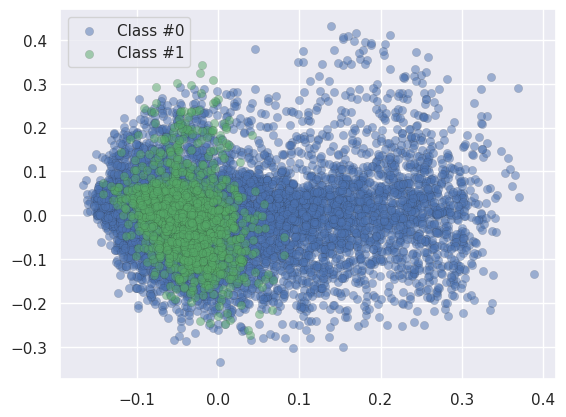

In [10]:

print('Resampled dataset shape (Clustering Centroids) %s' % Counter(ncry))

ncrx_vis = pca.fit_transform(ncrx.toarray())

# Visualization
palette = sns.color_palette()
plt.scatter(ncrx_vis[ncry == 0, 0], ncrx_vis[ncry == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(ncrx_vis[ncry == 1, 0], ncrx_vis[ncry == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()


#Hybrid
Where we first undersample majority class to eliminate repetitive / noisy data

Then use SMOTE to oversample the minority

Resampled dataset shape Counter({1: 8906, 0: 8906})


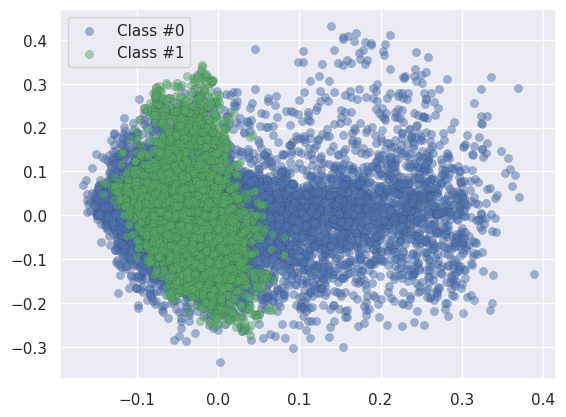

In [11]:

# Basic Balanced SMOTE
smote = SMOTE()
hybridsmote_x, hybridsmote_y = smote.fit_resample(ncrx, ncry)
print('Resampled dataset shape %s' % Counter(hybridsmote_y))

hybridsmote_x_vis = pca.transform(hybridsmote_x.toarray())

# Visualization
palette = sns.color_palette()
plt.scatter(hybridsmote_x_vis[hybridsmote_y == 0, 0], hybridsmote_x_vis[hybridsmote_y == 0, 1], label="Class #0", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[0], linewidth=0.15)
plt.scatter(hybridsmote_x_vis[hybridsmote_y == 1, 0], hybridsmote_x_vis[hybridsmote_y == 1, 1], label="Class #1", alpha=0.5,
            edgecolor=almost_black, facecolor=palette[2], linewidth=0.15)

plt.legend()
plt.show()


# Training SVM

In [6]:
# selector_percentile = SelectPercentile( f_classif, percentile = 80 )
# hybridsmote_x_new = selector_percentile.fit_transform(hybridsmote_x, hybridsmote_y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   15  159  363  718 1061 1145 1417 1582 1606 1748 1982 2112 2302 2695
 3144 3309 3477 4170 5272 5303 5598 5869 6143 6374 6770 6912 7170] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [12]:
# SVM grid search for params
# C_range = np.logspace(-1, 3, 5)
gamma_range = np.logspace(-1, 6, 8)
# param_grid = dict(kernel=['linear', 'rbf'], C=C_range, gamma=gamma_range)
param_grid = dict(gamma=gamma_range)

grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, refit = True, verbose = 3)
grid.fit(hybridsmote_x, hybridsmote_y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .........................gamma=0.1;, score=0.734 total time= 2.6min
[CV 2/5] END .........................gamma=0.1;, score=0.972 total time= 2.9min
[CV 3/5] END .........................gamma=0.1;, score=0.971 total time= 2.8min
[CV 4/5] END .........................gamma=0.1;, score=0.967 total time= 2.8min
[CV 5/5] END .........................gamma=0.1;, score=0.972 total time= 2.8min
[CV 1/5] END .........................gamma=1.0;, score=0.763 total time= 2.2min
[CV 2/5] END .........................gamma=1.0;, score=0.997 total time= 3.2min
[CV 3/5] END .........................gamma=1.0;, score=0.996 total time= 3.2min
[CV 4/5] END .........................gamma=1.0;, score=0.994 total time= 3.2min
[CV 5/5] END .........................gamma=1.0;, score=0.995 total time= 3.1min
[CV 1/5] END ........................gamma=10.0;, score=0.945 total time=16.3min
[CV 2/5] END ........................gamma=10.0;,

Linear kernel: C=10.0, gamma = 1.0 -> 0.96

rbf kernel: gamma = 1.0 -> 0.95

In [13]:
svm_domain2 = SVC(kernel="linear", C=10.0)
svm_domain2.fit(hybridsmote_x, hybridsmote_y)


SVC(C=10.0, kernel='linear')

In [18]:
# Export model
import pickle as pkl
with open("svm_domain2.pkl", "wb") as writefile:
    pkl.dump([tfidf_vect, svm_domain2], writefile)

In [20]:
# Export pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('tfidf', tfidf_vect),
    ('svc', svm_domain2)
])

import pickle as pkl
with open("joey_svm_domain2_pipeline.pkl", "wb") as writefile:
    pkl.dump([pipe, tfidf_vect, tfidf_tokenizer, svm_domain2], writefile)


In [ ]:
# Test data prediction
with open("/content/test_data.json") as f:
    df_test = pd.read_json(f, lines=True)

pred_svm_domain2 = pipe.predict(df_test['text'])


In [ ]:

# Save Predictions to CSV
output_df = pd.DataFrame({'id': df_test['id'], 'class': pred_svm_domain2})
output_csv_path = '/content/test_predictions.csv'
output_df.to_csv(output_csv_path, index=False)